# 决策树、随机森林和 XGBoost

author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## 1 数据集介绍

Iris 数据集的中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set。Iris 包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息。Iris 数据集是用来给花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征。

#### 1.1 导入数据集

为了了解数据集，我们使用info函数和head函数观测数据整体信息和简单的数据查看


In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target
iris_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # 转化为 DataFrame 格式
# 利用.info()查看数据的整体信息
print(iris_features.info())
# 进行简单的数据查看，我们可以利用 .head() 头部
print(iris_features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### 1.2 划分训练集和测试集

train_test_split方法能够将数据集按照用户的需要指定划分为训练集和测试集，本例我们将训练集和测试集的占比分为7:3，random_state设为1，令每次生成的数据都相同

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 1.3 观察数据集

使用concat函数连接训练集和测试集两个数组（使用该方法前需将对应对象转为DataFrame形式）

In [ ]:
pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1).head()

,0,1,0
0,6.9,2.3,2
1,1.7,0.3,0
2,1.4,0.2,0
3,1.4,0.3,0
4,3.9,1.4,1


## 2 决策树模型

建立决策树模型，决策树以信息熵增益最大进行划分，最大深度为3,随机数生成器使用的种子设置一个常数保证在研究参数时不会被随机数干扰。

### 2.1 模型训练

使用Scikit-learn库中的`DecisionTreeClassifier`类创建了一个决策树分类器，以熵为分割标准，最大深度为3。`random_state`参数被设置为42，用于确保数据集的随机分割在程序的不同运行中是一致的。

In [5]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
tree_clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 2.2 模型可视化

导出一个决策树分类器（Decision Tree Classifier）的图形表示，使用graphviz库来显示它。

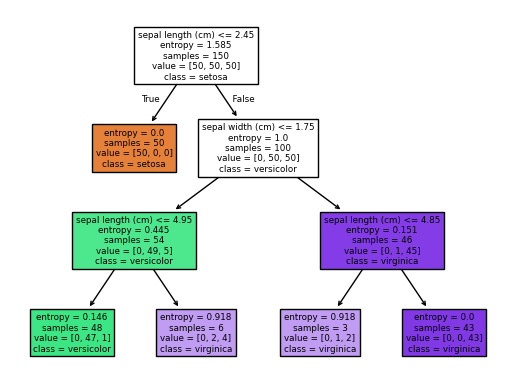

In [6]:
from sklearn.tree import plot_tree


plot_tree(
    tree_clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)
plt.show()

### 2.3 决策边界

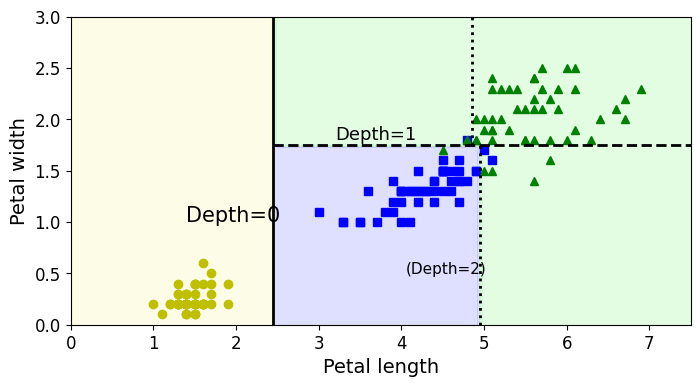

In [7]:
import numpy as np
from matplotlib import pyplot as plt

# 导入matplotlib.colors模块中的ListedColormap类，用于自定义颜色映射
from matplotlib.colors import ListedColormap
# 导入numpy模块，用于处理多维数组和矩阵运算

# 定义一个函数plot_decision_boundary，用于绘制决策树分类器的决策边界
# 参数说明：
# clf: 一个已经训练好的决策树分类器对象
# X: 一个二维数组，表示输入特征变量（这里是花瓣长度和宽度）
# y: 一个一维数组，表示目标变量（这里是鸢尾花的类别）
# axes: 一个列表，表示特征空间的范围（x轴和y轴的最小值和最大值）
# iris: 一个布尔值，表示是否使用鸢尾花数据集，默认为True
# legend: 一个布尔值，表示是否显示图例，默认为False
# plot_training: 一个布尔值，表示是否绘制训练数据点，默认为True


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # 创建两个等差数列，分别表示x轴和y轴上的坐标值，每个数列有100个元素
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    # 使用np.meshgrid函数创建两个网格矩阵，分别表示x轴和y轴上的网格点坐标
    x1, x2 = np.meshgrid(x1s, x2s)
    # 将两个网格矩阵拼接成一个二维数组X_new，每行包含两个元素（x1和x2）
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 使用clf.predict函数对X_new中的每个网格点进行预测，并将结果重塑成与x1相同形状的矩阵y_pred
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # 创建一个自定义颜色映射custom_cmap，包含三种颜色（黄色、蓝色、绿色），分别对应三种类别
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    # 使用plt.contourf函数绘制等高线填充图，显示不同类别区域的颜色
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    # 如果不是使用鸢尾花数据集，则再使用plt.contour函数绘制等高线图，显示不同类别区域的边界
    if not iris:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        # 绘制三种类别的数据点，使用不同的形状和颜色表示
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")
        # 设置坐标轴的范围
        plt.axis(axes)
    # 如果是使用鸢尾花数据集，则设置坐标轴的标签为花瓣长度和宽度
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    # 否则，设置坐标轴的标签为x1和x2
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    # 如果需要显示图例，则设置图例的位置和字体大小
    if legend:
        plt.legend(loc="lower right", fontsize=14)


# 创建一个新的图形窗口，设置大小为8*4英寸
plt.figure(figsize=(8, 4))
# 调用plot_decision_boundary函数，传入决策树分类器对象tree_clf，输入特征变量X和目标变量y
plot_decision_boundary(tree_clf, X, y)
# 使用plt.plot函数绘制一条黑色实线，表示决策树第一次分裂时的边界（花瓣长度等于2.45厘米）
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# 使用plt.plot函数绘制一条黑色虚线，表示决策树第二次分裂时的边界（花瓣宽度等于1.75厘米）
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# 使用plt.plot函数绘制一条黑色点线，表示决策树第三次分裂时左侧区域的边界（花瓣长度等于4.95厘米）
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# 使用plt.plot函数绘制一条黑色点线，表示决策树第三次分裂时右侧区域的边界（花瓣长度等于4.85厘米）
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# 使用plt.text函数在不同深度处添加文本说明
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# 显示图形窗口
plt.show()

### 2.4 模型预测与评估

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9716
Test Precision: 0.9794
Train Recall: 0.9714
Test Recall: 0.9778
Train F1: 0.9714
Test F1: 0.9779


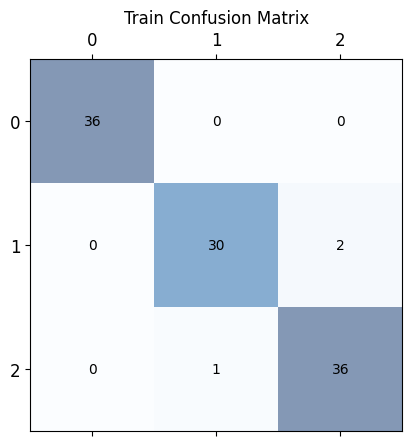

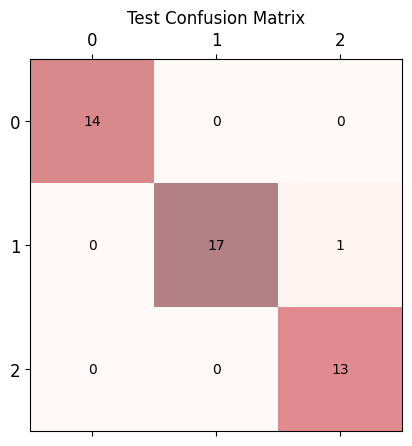

In [9]:
from sklearn.metrics import confusion_matrix


matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")

## 3 随机森林模型

随机森林是利用多棵决策树对样本进行训练并预测的一种分类器。采用10个决策树，最大层数为3，决策树以信息熵增益最大进行划分,random_state设为整数，确保结果的可再现性。

### 3.1 模型训练

使用Scikit-learn库中的`RandomForestClassifier`类创建了一个随机森林分类器，其中每棵决策树以熵为分割标准，最大深度为3。

In [10]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=10, random_state=1, criterion="entropy", max_depth=3, verbose=0)
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3.2 模型可视化

导出一个随机森林分类器的图形表示，使用graphviz库来显示它。

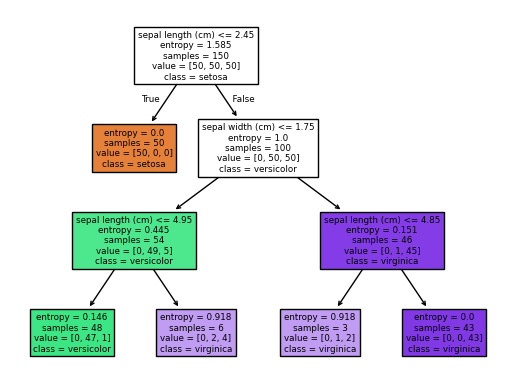

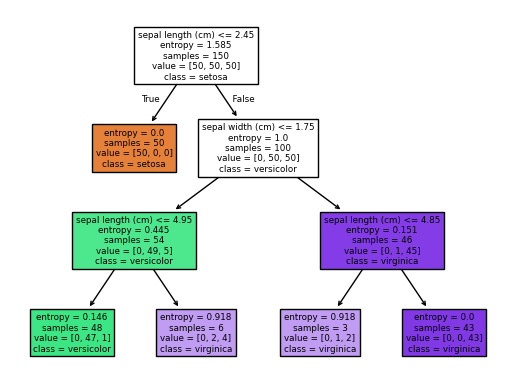

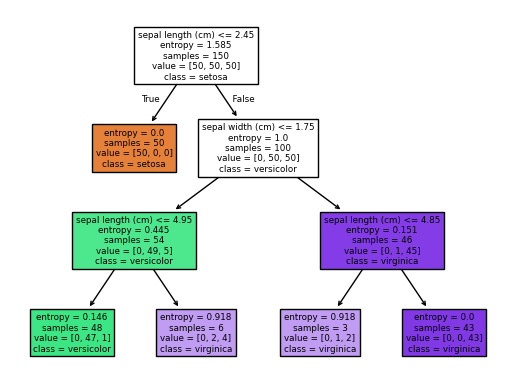

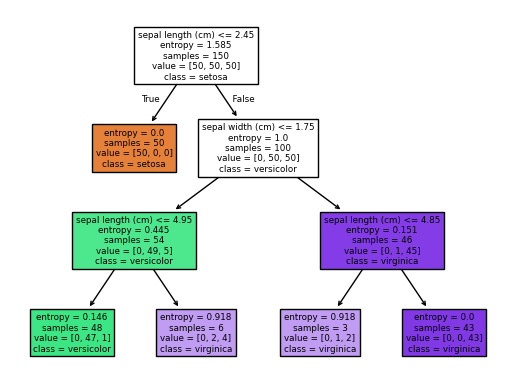

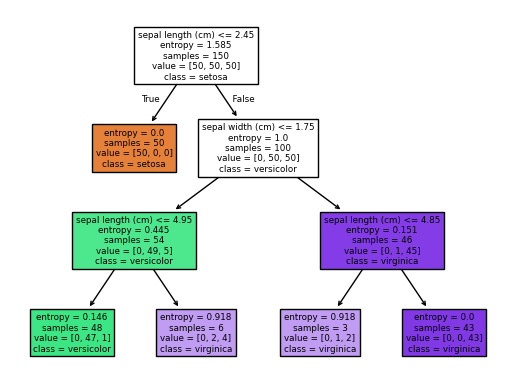

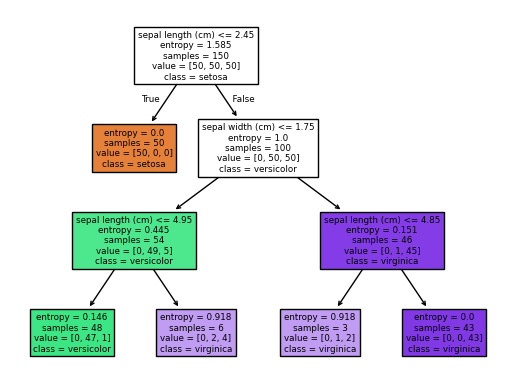

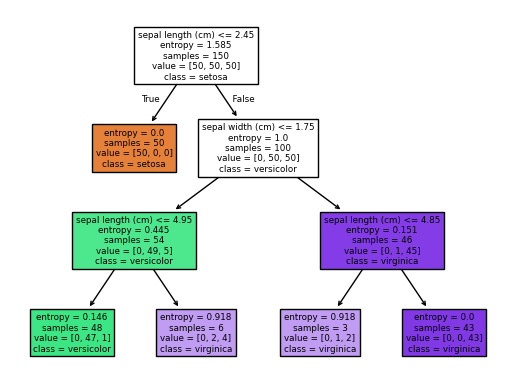

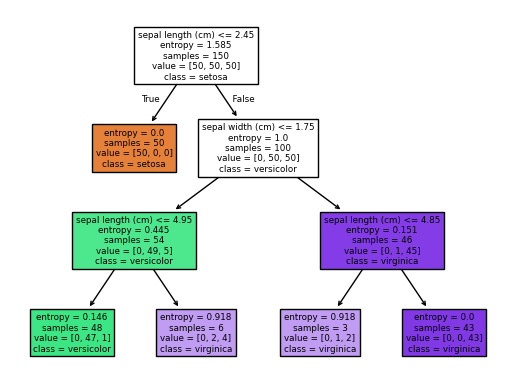

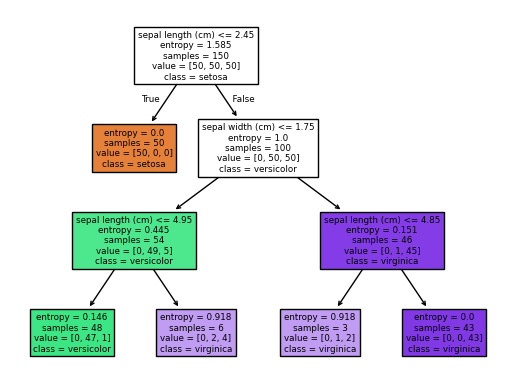

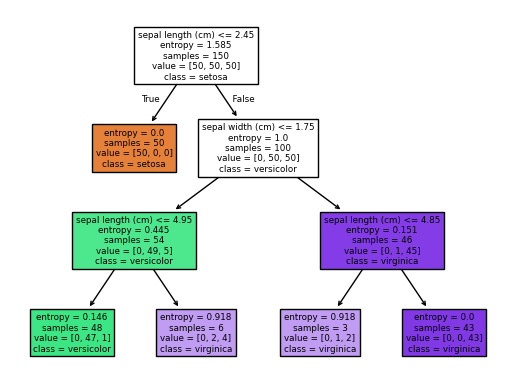

In [11]:
# 随机森林可视化，循环打印每棵树
for idx, estimator in enumerate(rfc.estimators_):
    plot_tree(
        tree_clf,
        filled=True,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
    )
    plt.show()

### 3.3 各棵树的表决

In [12]:
X_new = X_train[:1]
y_new = rfc.predict(X_new)

votes = []
for tree in rfc.estimators_:  # 遍历所有的决策树对象
    vote = tree.predict(X_new)  # 调用predict方法得到预测结果
    votes.append(vote)  # 将预测结果添加到列表中
print(f"各棵树的表决为：{np.array(votes).reshape(-1)}")
print(f"随机森林认为分类结果为{rfc.predict(X_new)[0]}")

各棵树的表决为：[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
随机森林认为分类结果为2


根据少数服从多数的原则，多数决策树认为该样本为virginica，因此随机森林也认为该样本为virginica。

### 3.4 模型预测与评估

In [13]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9630
Test Precision: 0.9556
Train Recall: 0.9619
Test Recall: 0.9556
Train F1: 0.9620
Test F1: 0.9556


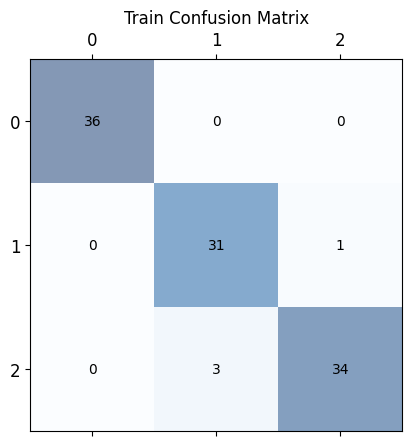

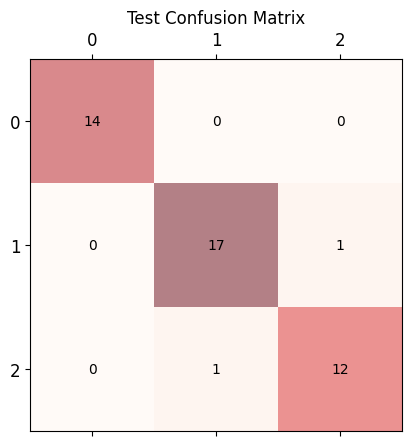

In [14]:
matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")

### 3.5 模型优化

使用网格搜索寻找随机森林的较优参数

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [5, 10, 15], "max_depth": [2, 3, 4]},
    {"bootstrap": [False], "n_estimators": [10, 15], "max_depth": [2, 3, 4, 5]},
]
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=5,
    scoring="f1_weighted",
)
grid_search.fit(X_train, y_train)
print(f"best params: {grid_search.best_params_}")
rfc_opt = RandomForestClassifier(**grid_search.best_params_)
rfc_opt.fit(X_train, y_train)
y_train_pred = rfc_opt.predict(X_train)
y_test_pred = rfc_opt.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

best params: {'max_depth': 3, 'n_estimators': 10}
Train Precision: 0.9819
Test Precision: 0.9556
Train Recall: 0.9810
Test Recall: 0.9556
Train F1: 0.9809
Test F1: 0.9556


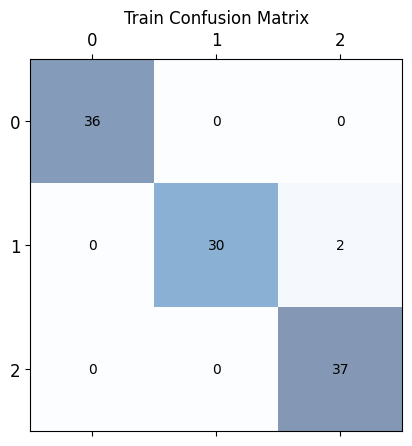

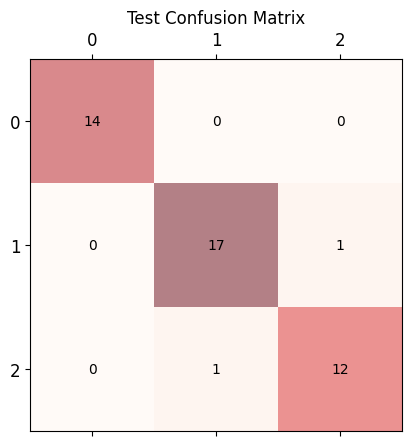

In [16]:
matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")

## 4 梯度提升树

### 4.1 模型训练

使用xgboost库中的`XGBClassifier`类创建了一个梯度提升树分类器。

In [17]:
from xgboost import XGBClassifier


xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### 4.2 模型预测与评估

我们使用混淆矩阵来评估模型的性能。

In [18]:
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

prec_train = precision_score(y_train, y_train_pred, average="weighted")
prec_test = precision_score(y_test, y_test_pred, average="weighted")
reca_train = recall_score(y_train, y_train_pred, average="weighted")
reca_test = recall_score(y_test, y_test_pred, average="weighted")
f1_train = f1_score(y_train, y_train_pred, average="weighted")
f1_test = f1_score(y_test, y_test_pred, average="weighted")
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9907
Test Precision: 0.9586
Train Recall: 0.9905
Test Recall: 0.9556
Train F1: 0.9905
Test F1: 0.9550


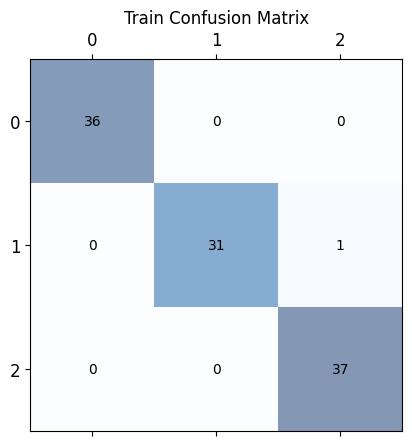

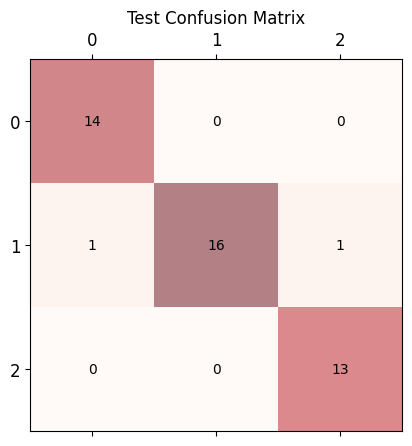

In [19]:
matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")